In [30]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.animation as animation
from IPython.display import display, clear_output

In [31]:
with open('data.json') as json_file:
    data = json.load(json_file)

In [42]:
a = data['0'][0]['faceAttributes']['emotion']

index = []
for p in a:
    index.append(p)


df = pd.DataFrame(columns=index)

for p in data:
    for i in range(len(data[p])):
        df.loc[len(df)] = list(data[p][i]['faceAttributes']['emotion'].values())

        
    for c in df.tail(10).columns:
        plt.plot(df.tail(10).index, df.tail(10)[c], label=c)

    plt.axis("off")
    #plt.legend()
    plt.savefig("emo_vis/" + "image%05d.png" % (int(p) / 10), transparent=True)
    
    plt.close()

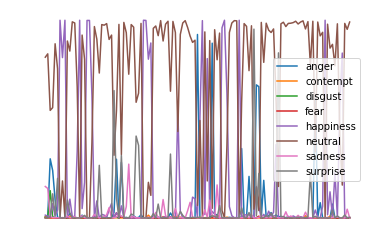

In [28]:
for c in df.columns:
    plt.plot(df.index, df[c], label=c)
plt.legend()
plt.axis('off')
plt.show()

In [5]:
df.head(20)

,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise
0,0.006,0.005,0.002,0.000,0.014,0.813,0.159,0.000
1,0.007,0.003,0.002,0.000,0.009,0.830,0.149,0.000
2,0.299,0.001,0.138,0.000,0.006,0.544,0.007,0.005
3,0.240,0.000,0.005,0.001,0.072,0.558,0.002,0.122
4,0.092,0.000,0.003,0.000,0.009,0.881,0.001,0.014
5,0.003,0.000,0.000,0.000,0.041,0.755,0.001,0.200
6,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
7,0.000,0.000,0.000,0.000,0.811,0.187,0.002,0.000
8,0.000,0.001,0.000,0.001,0.001,0.895,0.010,0.091
9,0.023,0.009,0.001,0.000,0.095,0.844,0.001,0.026


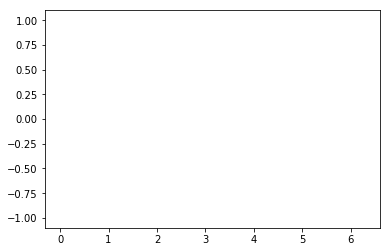

In [6]:

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()


In [7]:
import requests

In [8]:
index

['anger',
 'contempt',
 'disgust',
 'fear',
 'happiness',
 'neutral',
 'sadness',
 'surprise']

In [9]:
p_data = {
    "time": 96,
    "positive": 0,
    "negative": 0,
    "anger": 1.2,
    "contempt": 1.2,
    "disgust": 1.2,
    "fear": 1.2,
    "happiness": 1.2,
    "neutral": 1.2,
    "sadness": 1.2,
    "surprise": 1.2
}

In [10]:
p_data

{'time': 96,
 'positive': 0,
 'negative': 0,
 'anger': 1.2,
 'contempt': 1.2,
 'disgust': 1.2,
 'fear': 1.2,
 'happiness': 1.2,
 'neutral': 1.2,
 'sadness': 1.2,
 'surprise': 1.2}

In [11]:
a = data['0'][0]['faceAttributes']['emotion']
print(a)

{'anger': 0.006, 'contempt': 0.005, 'disgust': 0.002, 'fear': 0.0, 'happiness': 0.014, 'neutral': 0.813, 'sadness': 0.159, 'surprise': 0.0}


In [39]:
import time
import cv2
import cognitive_face as CF

In [40]:
path = 'img_cache.jpg'
cam = cv2.VideoCapture(0)

KEY = 'd362531db61f41728ebff0e734b80fc1'  # Replace with a valid Subscription Key here.
CF.Key.set(KEY)

BASE_URL = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0'  # Replace with your regional Base URL
CF.BaseUrl.set(BASE_URL)

url = "https://api.powerbi.com/beta/03e3d621-f48e-467f-8a5a-6b74a23db6c7/datasets/b3cfa586-1a02-4f41-90c1-062be84a779d/rows?key=lXWZZF%2BU4Af%2FWaCUML%2BdVrk6V4NMHWfbOxTdrT33tibeQcICeBTdP935AFO9rLvXp6RvspB7k0Kby6Q1nWt8UA%3D%3D"


In [41]:
while True:
    
    retval, frame = cam.read()
    
    if retval != True:
        raise ValueError("Can't read frame")
    cv2.imwrite(path, frame)
    
    attributes = (
                'age,gender,headPose,smile,facialHair,glasses,emotion,hair,'
                'makeup,occlusion,accessories,blur,exposure,noise')
    result = CF.face.detect(path, False, False, attributes)
    for i in range(len(result)):

        result = result[i]
        
        a = result['faceAttributes']['emotion']

        a['time'] = '{}-{}-{} {}:{}:{}'.format(*time.gmtime(time.time()))
        a['positive'] = a['anger'] + a['surprise'] + a['happiness']
        a['negative'] = a['fear'] + a['disgust'] + a['contempt']

        b = json.dumps(a)

        r = requests.post(url, data=b)
        print(r.status_code, r.reason)

        time.sleep(4)

200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK
200 OK


KeyError: 1

In [43]:
cam.release()

In [ ]:
url = "https://api.powerbi.com/beta/03e3d621-f48e-467f-8a5a-6b74a23db6c7/datasets/b3cfa586-1a02-4f41-90c1-062be84a779d/rows?key=lXWZZF%2BU4Af%2FWaCUML%2BdVrk6V4NMHWfbOxTdrT33tibeQcICeBTdP935AFO9rLvXp6RvspB7k0Kby6Q1nWt8UA%3D%3D"



for p in data:
    if len(data[p]) > 0:
        a = data[p][0]['faceAttributes']['emotion']
            
        a['time'] = '{}-{}-{} {}:{}:{}'.format(*time.gmtime(time.time()))
        a['positive'] = a['anger'] + a['surprise'] + a['happiness']
        a['negative'] = a['fear'] + a['disgust'] + a['contempt']
    
        
        b = json.dumps(a)
        
        r = requests.post(url, data=b)
        print(r.status_code, r.reason)
        time.sleep(1)
        

In [ ]:
t_data

In [ ]:

r = requests.post(url, data=t_data)
print(r.status_code, r.reason)